# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if (city,country) not in cities:
        cities.append((city,country))

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:


city_df = pd.DataFrame(cities)
city_df.rename(inplace=True,columns={0:'City', 1: 'Country'})
city_df['Cloudiness'] = ''
city_df['Date'] = ''
city_df['Humidity'] = ''
city_df['Lat'] = ''
city_df['Lng'] = ''
city_df['Max Temp'] = ''
city_df['Wind Speed'] = ''

In [40]:
print(f"Beginning Data Retrieval")
print(f"-----------------------------")
for i,row in city_df.iterrows():
        
    print(f"Processing Record {i} of Set 1 | {row['City']}.")
    try:
        weather = owm.get_current(row['City'], **settings)  
        city_df.at[i,'Cloudiness'] = weather(*["clouds.all"])
        city_df.at[i,'Date'] = weather(*["dt"])
        city_df.at[i,'Humidity'] = weather(*["main.humidity"])
        city_df.at[i,'Lat'] = weather(*["coord.lat"])
        city_df.at[i,'Lng'] = weather(*["coord.lon"])
        city_df.at[i,'Max Temp'] = weather(*["main.temp_max"])
        city_df.at[i,'Wind Speed'] = weather(*["wind.speed"])
    except:
        print("City not found. Skipping...")
    time.sleep(1)
    print("------------")
    
print(f"Data Retrieval Complete")
print(f"-----------------------------")
city_df.head()

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | vaini.
------------
Processing Record 1 of Set 1 | kamaishi.
------------
Processing Record 2 of Set 1 | hilo.
------------
Processing Record 3 of Set 1 | port elizabeth.
------------
Processing Record 4 of Set 1 | siavonga.
------------
Processing Record 5 of Set 1 | bonthe.
------------
Processing Record 6 of Set 1 | georgetown.
------------
Processing Record 7 of Set 1 | saint-pierre.
------------
Processing Record 8 of Set 1 | cape town.
------------
Processing Record 9 of Set 1 | illoqqortoormiut.
City not found. Skipping...
------------
Processing Record 10 of Set 1 | toora-khem.
------------
Processing Record 11 of Set 1 | ahipara.
------------
Processing Record 12 of Set 1 | ushuaia.
------------
Processing Record 13 of Set 1 | port alfred.
------------
Processing Record 14 of Set 1 | rikitea.
------------
Processing Record 15 of Set 1 | marcona.
City not found. Skipping...
------------
Proces

------------
Processing Record 138 of Set 1 | yellowknife.
------------
Processing Record 139 of Set 1 | thunder bay.
------------
Processing Record 140 of Set 1 | tuatapere.
------------
Processing Record 141 of Set 1 | whitefish.
------------
Processing Record 142 of Set 1 | cooma.
------------
Processing Record 143 of Set 1 | fare.
------------
Processing Record 144 of Set 1 | gamba.
------------
Processing Record 145 of Set 1 | saint-philippe.
------------
Processing Record 146 of Set 1 | pevek.
------------
Processing Record 147 of Set 1 | tocopilla.
------------
Processing Record 148 of Set 1 | kaitangata.
------------
Processing Record 149 of Set 1 | sibanicu.
------------
Processing Record 150 of Set 1 | east london.
------------
Processing Record 151 of Set 1 | abha.
------------
Processing Record 152 of Set 1 | karimpur.
------------
Processing Record 153 of Set 1 | hearst.
------------
Processing Record 154 of Set 1 | cody.
------------
Processing Record 155 of Set 1 | rawli

------------
Processing Record 277 of Set 1 | verkhoyansk.
------------
Processing Record 278 of Set 1 | maumere.
------------
Processing Record 279 of Set 1 | pa sang.
------------
Processing Record 280 of Set 1 | nanortalik.
------------
Processing Record 281 of Set 1 | namibe.
------------
Processing Record 282 of Set 1 | ponta do sol.
------------
Processing Record 283 of Set 1 | san ramon.
------------
Processing Record 284 of Set 1 | rosarito.
------------
Processing Record 285 of Set 1 | anadyr.
------------
Processing Record 286 of Set 1 | smoky lake.
------------
Processing Record 287 of Set 1 | noyakert.
------------
Processing Record 288 of Set 1 | diego de almagro.
------------
Processing Record 289 of Set 1 | hofn.
------------
Processing Record 290 of Set 1 | sarangani.
------------
Processing Record 291 of Set 1 | labuhan.
------------
Processing Record 292 of Set 1 | ahuimanu.
------------
Processing Record 293 of Set 1 | cam ranh.
------------
Processing Record 294 of 

------------
Processing Record 417 of Set 1 | formosa.
------------
Processing Record 418 of Set 1 | batangafo.
------------
Processing Record 419 of Set 1 | saint-junien.
------------
Processing Record 420 of Set 1 | urumqi.
City not found. Skipping...
------------
Processing Record 421 of Set 1 | coquimbo.
------------
Processing Record 422 of Set 1 | ugoofaaru.
------------
Processing Record 423 of Set 1 | barentsburg.
City not found. Skipping...
------------
Processing Record 424 of Set 1 | sola.
------------
Processing Record 425 of Set 1 | tucuman.
------------
Processing Record 426 of Set 1 | puerto madryn.
------------
Processing Record 427 of Set 1 | maceio.
------------
Processing Record 428 of Set 1 | acarau.
City not found. Skipping...
------------
Processing Record 429 of Set 1 | vila.
------------
Processing Record 430 of Set 1 | korhogo.
------------
Processing Record 431 of Set 1 | pemangkat.
City not found. Skipping...
------------
Processing Record 432 of Set 1 | kuda

------------
Processing Record 554 of Set 1 | yarmouth.
------------
Processing Record 555 of Set 1 | kegayli.
City not found. Skipping...
------------
Processing Record 556 of Set 1 | chabahar.
------------
Processing Record 557 of Set 1 | puerto escondido.
------------
Processing Record 558 of Set 1 | dukat.
------------
Processing Record 559 of Set 1 | atmakur.
------------
Processing Record 560 of Set 1 | vilyuysk.
------------
Processing Record 561 of Set 1 | bentiu.
City not found. Skipping...
------------
Processing Record 562 of Set 1 | northam.
------------
Processing Record 563 of Set 1 | port augusta.
------------
Processing Record 564 of Set 1 | singaparna.
------------
Processing Record 565 of Set 1 | luderitz.
------------
Processing Record 566 of Set 1 | suhbaatar.
------------
Processing Record 567 of Set 1 | santa fe.
------------
Processing Record 568 of Set 1 | tursunzoda.
------------
Processing Record 569 of Set 1 | macaboboni.
City not found. Skipping...
---------

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,to,100,1556495239,90,15.34,74.49,78.41,2.04
1,kamaishi,jp,0,1556492400,75,39.28,141.86,46.4,1.12
2,hilo,us,75,1556494711,78,19.71,-155.08,75.2,5.82
3,port elizabeth,za,75,1556495006,59,39.31,-74.98,61,14.99
4,siavonga,zm,8,1556495023,58,-16.54,28.71,74.27,4.85


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
city_df.to_csv('city.csv',index=False)

In [4]:
city_df = pd.DataFrame.from_csv('city.csv')
city_df['Cloudiness']= pd.to_numeric(city_df['Cloudiness'], errors='coerce')
city_df = city_df.dropna(subset=['Cloudiness'])

city_df['Date']= pd.to_numeric(city_df['Date'], errors='coerce')
city_df = city_df.dropna(subset=['Date'])

city_df['Humidity']= pd.to_numeric(city_df['Humidity'], errors='coerce')
city_df = city_df.dropna(subset=['Humidity'])

city_df['Lat']= pd.to_numeric(city_df['Lat'], errors='coerce')
city_df = city_df.dropna(subset=['Lat'])

city_df['Lng']= pd.to_numeric(city_df['Lng'], errors='coerce')
city_df = city_df.dropna(subset=['Lng'])

city_df['Max Temp']= pd.to_numeric(city_df['Max Temp'], errors='coerce')
city_df = city_df.dropna(subset=['Max Temp'])

city_df['Wind Speed']= pd.to_numeric(city_df['Wind Speed'], errors='coerce')
city_df = city_df.dropna(subset=['Wind Speed'])
city_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
vaini,to,100.0,1.556495e+09,90.0,15.34,74.49,78.41,2.04
kamaishi,jp,0.0,1.556492e+09,75.0,39.28,141.86,46.40,1.12
hilo,us,75.0,1.556495e+09,78.0,19.71,-155.08,75.20,5.82
port elizabeth,za,75.0,1.556495e+09,59.0,39.31,-74.98,61.00,14.99
siavonga,zm,8.0,1.556495e+09,58.0,-16.54,28.71,74.27,4.85


In [12]:
city_df.count()

Country       529
Cloudiness    529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

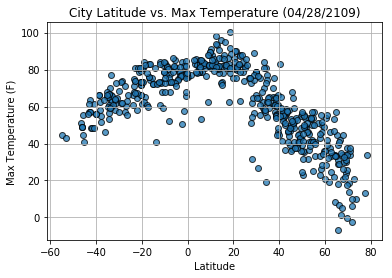

In [5]:
fig, ax = plt.subplots()
plt.grid()
plt.scatter(x=city_df['Lat'], y=city_df['Max Temp'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Max Temperature (04/28/2109)')
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
plt.show()

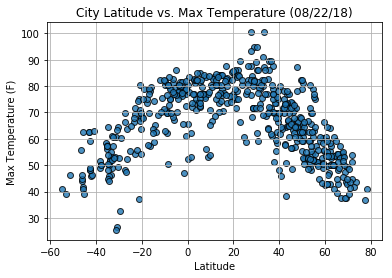

#### Latitude vs. Humidity Plot

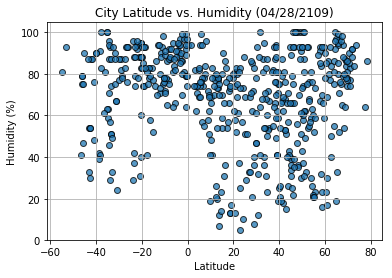

In [6]:
fig, ax = plt.subplots()
plt.grid()
plt.scatter(x=city_df['Lat'], y=city_df['Humidity'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Humidity (04/28/2109)')
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.show()

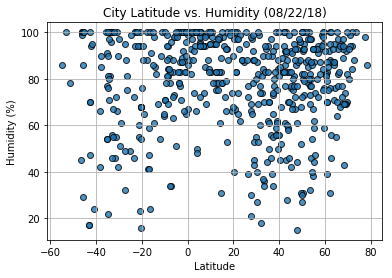

#### Latitude vs. Cloudiness Plot

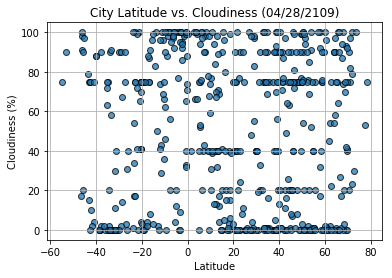

In [7]:
fig, ax = plt.subplots()
plt.grid()
plt.scatter(x=city_df['Lat'], y=city_df['Cloudiness'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Cloudiness (04/28/2109)')
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.show()

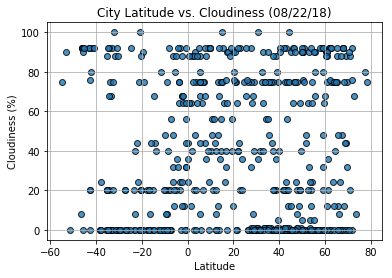

#### Latitude vs. Wind Speed Plot

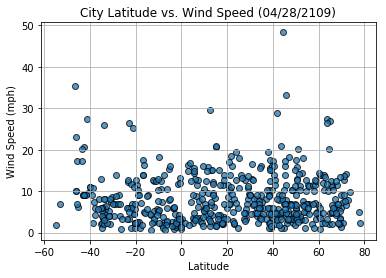

In [8]:
fig, ax = plt.subplots()
plt.grid()
plt.scatter(x=city_df['Lat'], y=city_df['Wind Speed'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Wind Speed (04/28/2109)')
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
plt.show()

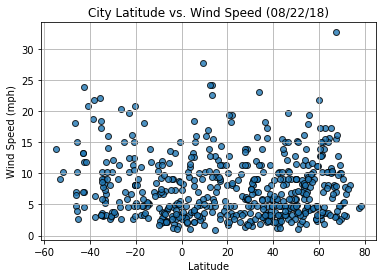